# **Import Libraries and Packages:**

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Loading the data and performing basic EDA:**

In [203]:
df = pd.read_csv('/content/drive/MyDrive/Detecting Anomalies in Transaction/transactions.csv', parse_dates=['TransactionDate', 'PreviousTransactionDate'])
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [204]:
df.shape

(2512, 16)

In [205]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [207]:
df.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN


1. **TransactionAmount:** The average transaction amount is around 297.59, with a large standard deviation (291.95), indicating a wide range of transaction values. The minimum is 0.26 and the maximum is 1919.11, suggesting potential outliers on the higher end.

2. **TransactionDuration:** The average transaction duration is about 119.64 seconds, ranging from 10 to 300 seconds. The standard deviation is around 69.96, suggesting a notable variation in how long transactions take.

3. **LoginAttempts:** The average number of login attempts is very low, around 1.12, with most transactions having only 1 login attempt. The maximum is 5, which might be an outlier or indicate suspicious activity for those specific transactions.



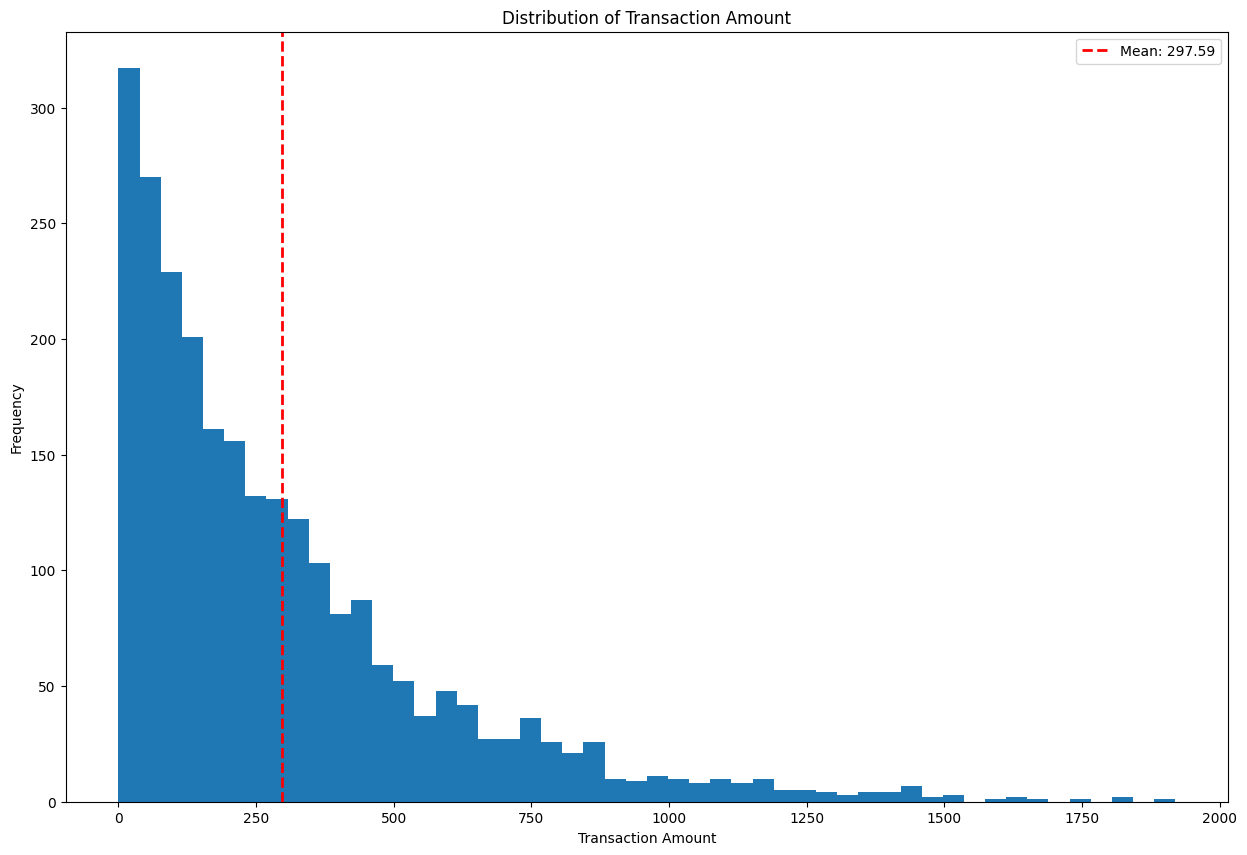

In [208]:
plt.figure(figsize=(15,10))
plt.hist(df['TransactionAmount'], bins = 50)
plt.axvline(df['TransactionAmount'].mean(), color='r', linestyle='dashed', linewidth=2, label=f'Mean: {df["TransactionAmount"].mean():.2f}')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.legend()
plt.show()

In [209]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [210]:
cat_columns = ['TransactionType','Location','Channel', 'CustomerAge','CustomerOccupation']
numerical_columns = ['TransactionAmount','TransactionDuration','LoginAttempts','AccountBalance']

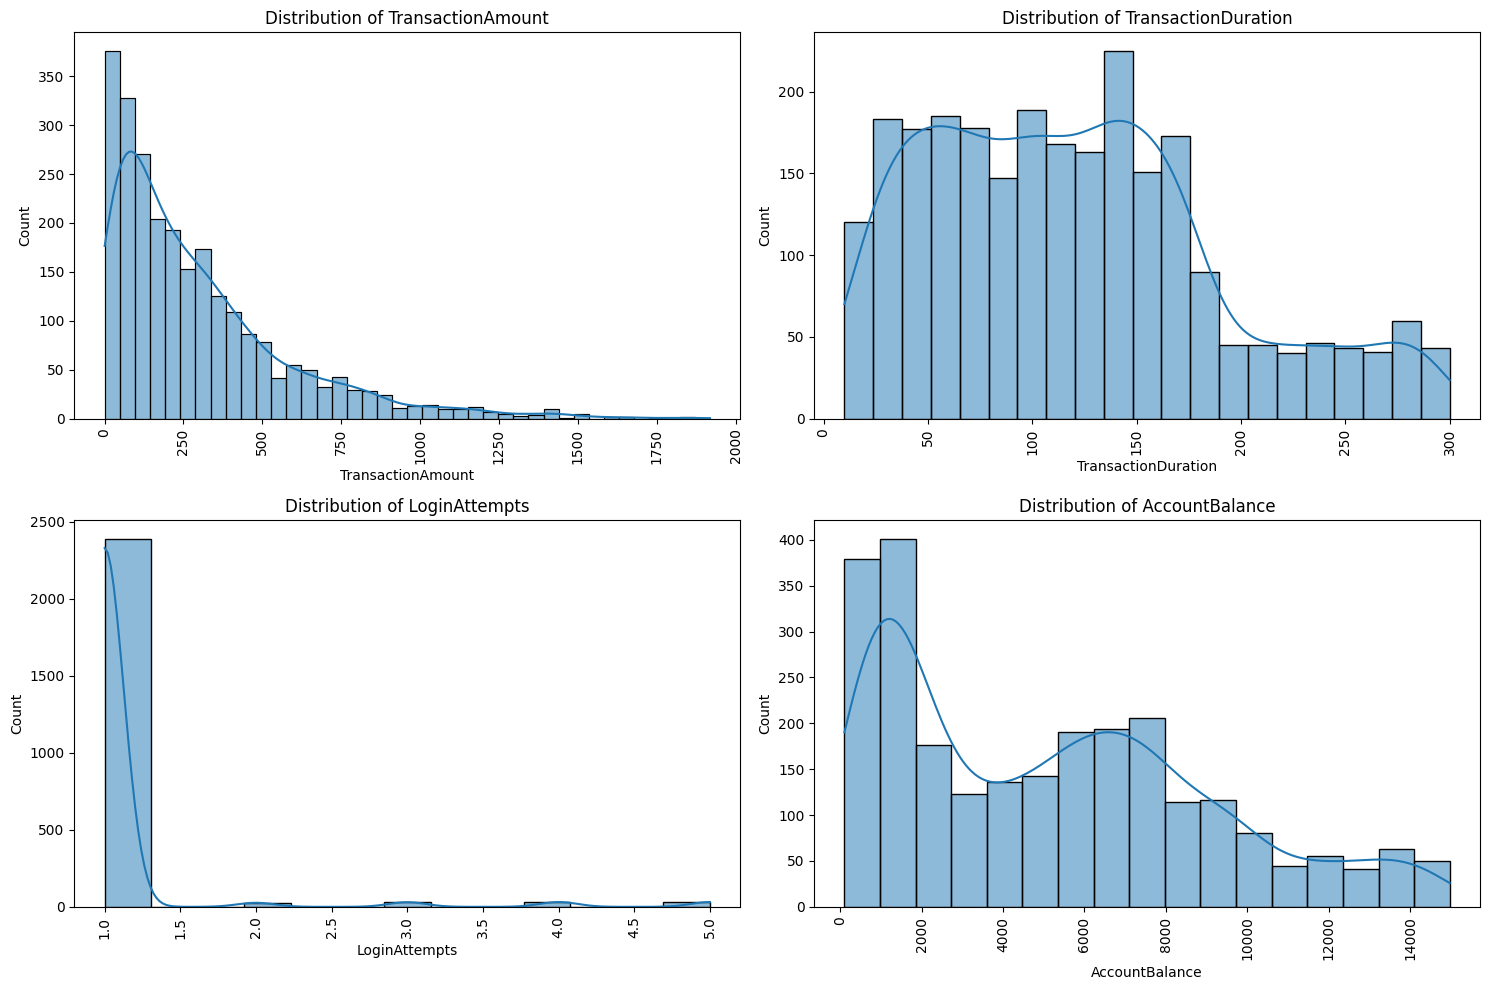

In [211]:
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, c in enumerate(numerical_columns):
  sns.histplot(df[c], kde=True, ax=axes[i])
  axes[i].set_title(f'Distribution of {c}')
  axes[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

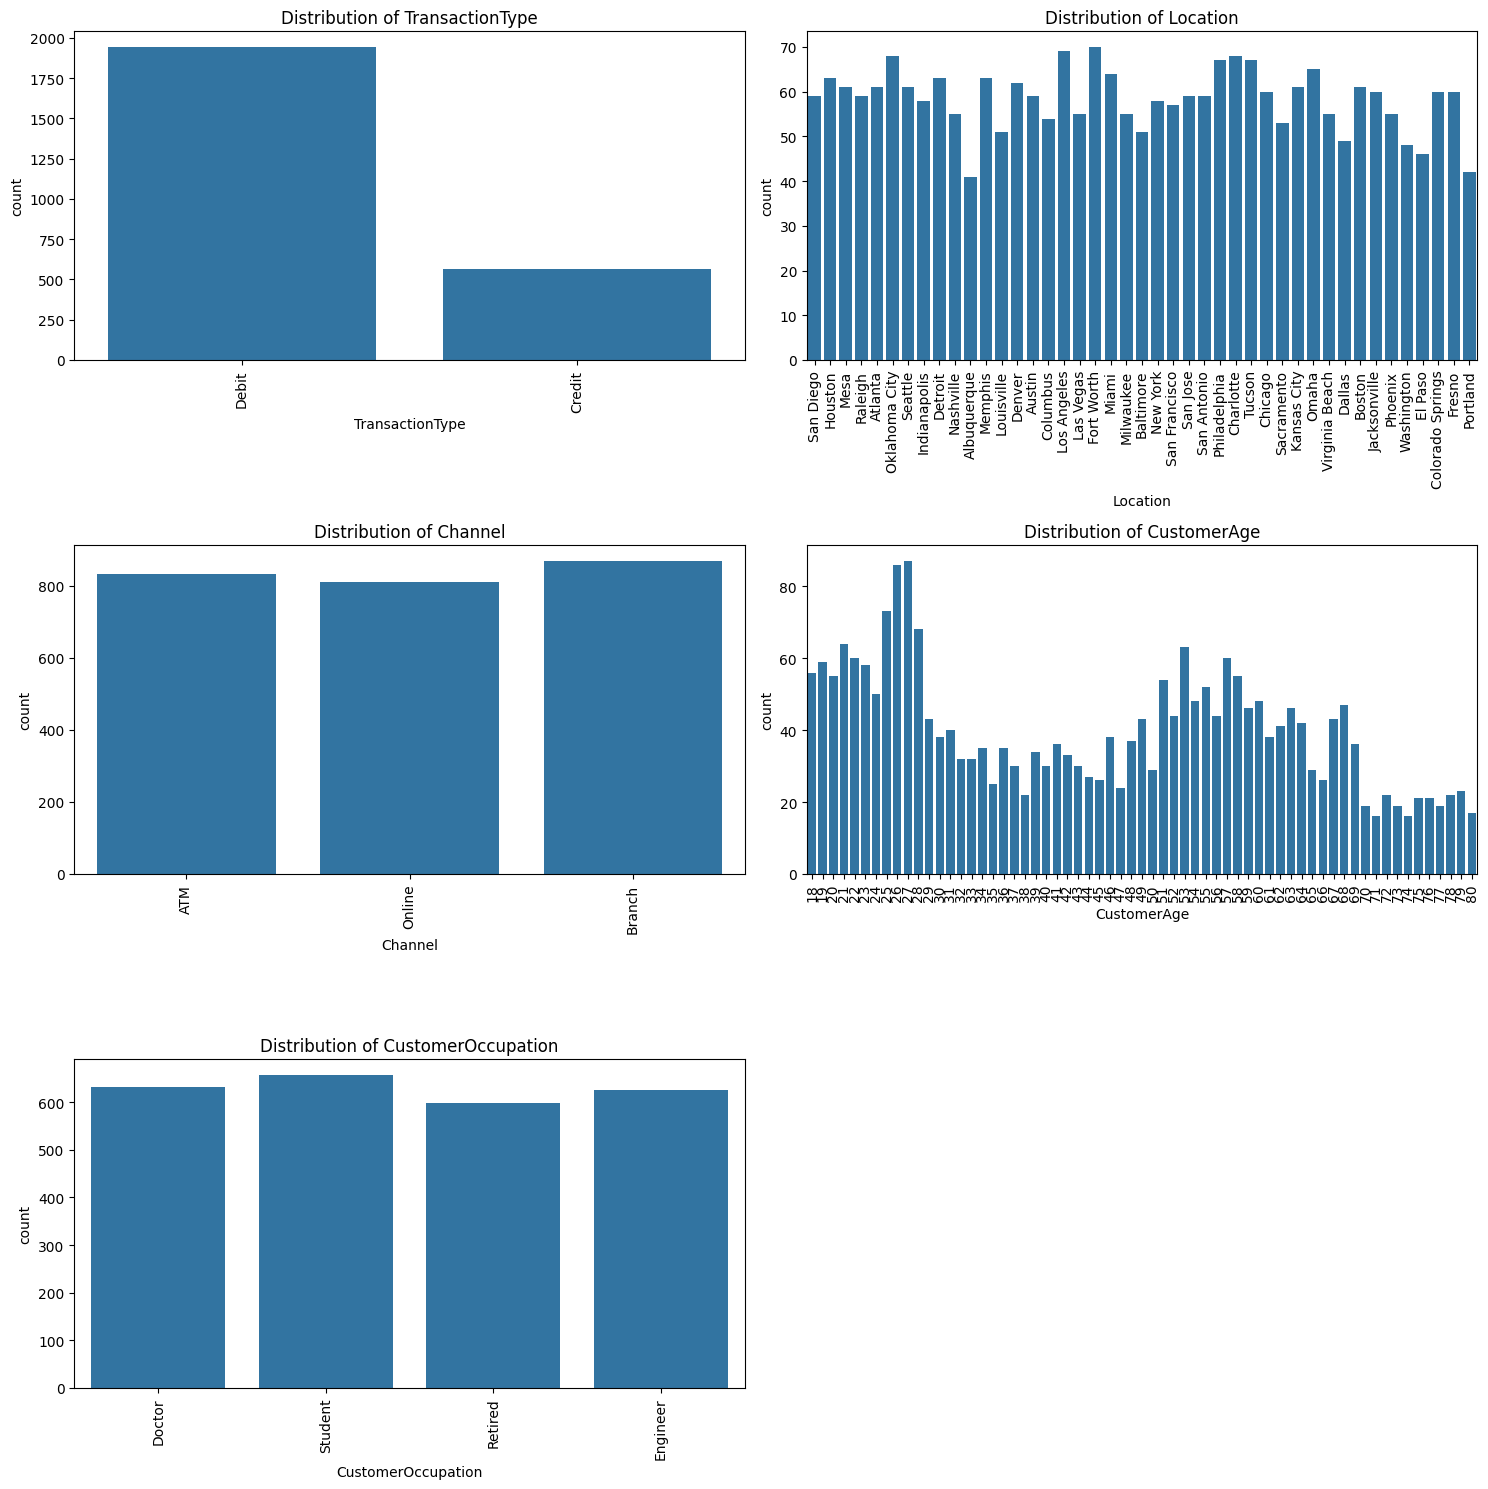

In [212]:
n_cols = 2
n_rows = (len(cat_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {c}')
    axes[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

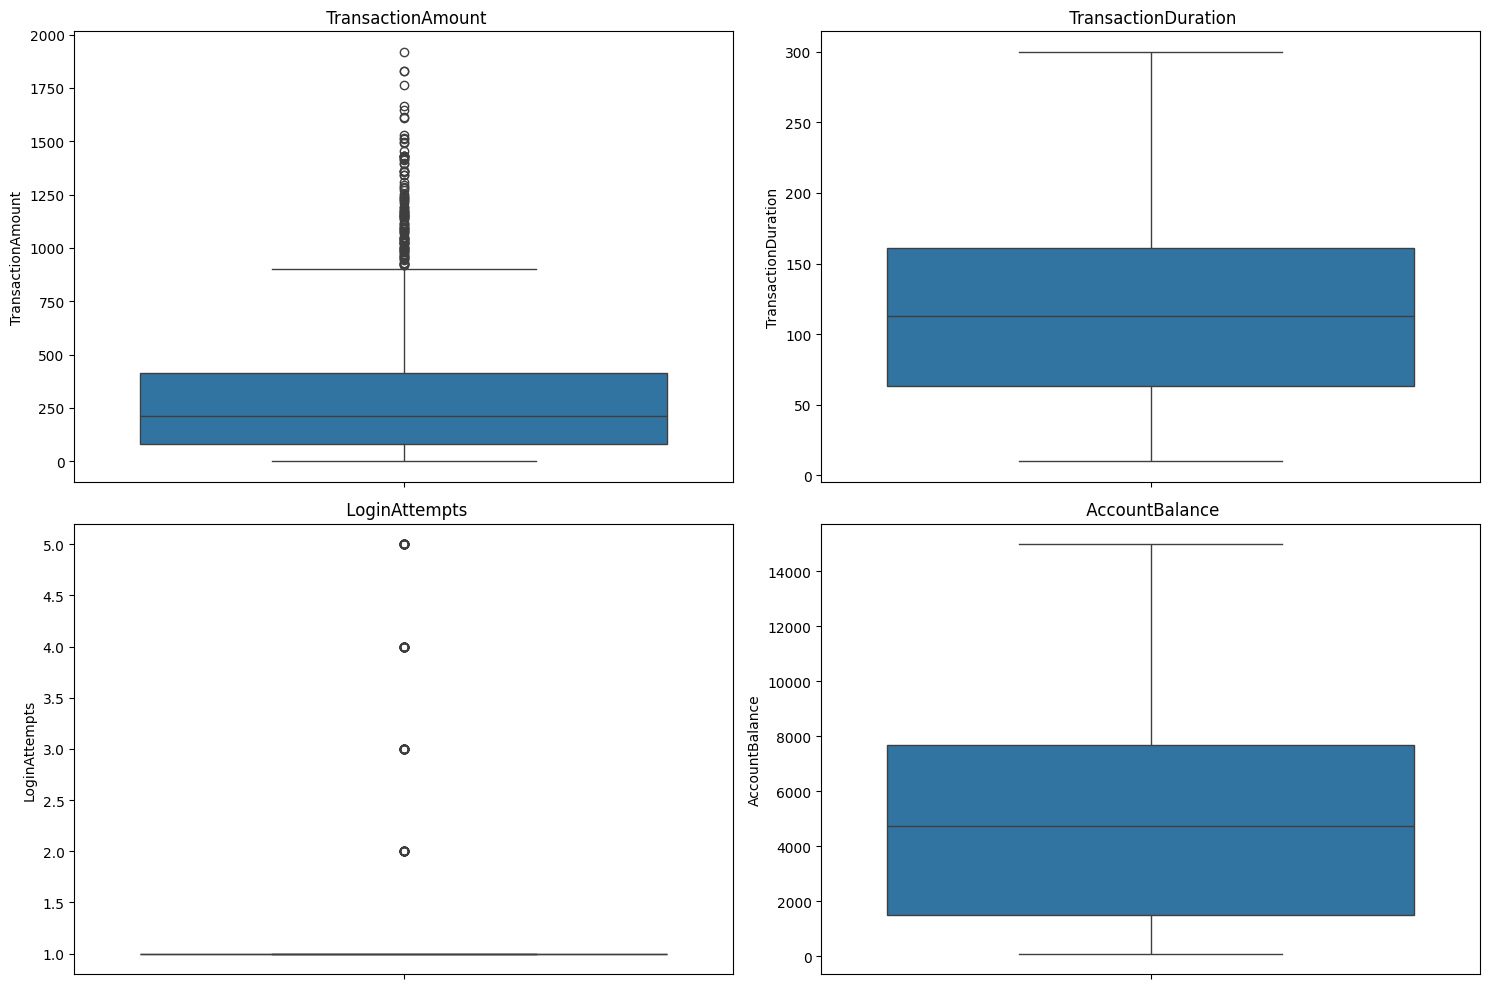

In [213]:
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, c in enumerate(numerical_columns):
    sns.boxplot(y=df[c], ax=axes[i])
    axes[i].set_title(f' {c}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [214]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

# **Grouping the transactions by Account ID, TransactionDate and IP Address:**

In [215]:
grouped_transactions = df.groupby(['AccountID', df['TransactionDate'].dt.date, 'IP Address']).size().reset_index(name='TransactionCount')
grouped_transactions.rename(columns={'TransactionDate': 'TransactionDateOnly'}, inplace=True)
display(grouped_transactions)

,AccountID,TransactionDateOnly,IP Address,TransactionCount
0,AC00001,2023-09-15,59.12.96.11,1
1,AC00001,2023-11-14,45.241.13.208,1
2,AC00002,2023-01-10,113.137.153.101,1
3,AC00002,2023-02-28,116.44.12.250,1
4,AC00002,2023-05-05,93.160.83.196,1
...,...,...,...,...
2507,AC00499,2023-11-27,217.233.219.196,1
2508,AC00500,2023-01-30,11.167.243.171,1
2509,AC00500,2023-03-13,147.114.91.132,1
2510,AC00500,2023-07-06,37.143.57.20,1


## **Transactions with more than one IP Address in the same day transactions:**

In [216]:
grouped_by_account_date = df.groupby(['AccountID', df['TransactionDate'].dt.date])['IP Address'].nunique().reset_index(name='UniqueIPCount')

print("Groups with more than one unique IP address:")
display(grouped_by_account_date[grouped_by_account_date['UniqueIPCount'] > 1])

Groups with more than one unique IP address:


,AccountID,TransactionDate,UniqueIPCount
23,AC00005,2023-02-22,2
49,AC00010,2023-06-26,2
108,AC00020,2023-08-24,2
157,AC00030,2023-05-10,2
557,AC00110,2023-06-26,2
576,AC00114,2023-10-23,2
721,AC00144,2023-05-29,2
748,AC00150,2023-02-27,2
755,AC00151,2023-06-05,2
764,AC00153,2023-08-21,2


## **Transactions with multiple IPs in duration less than 10 minutes from same account:**

In [217]:
potential_anomalous_groups = grouped_by_account_date[grouped_by_account_date['UniqueIPCount'] > 1]

# Filter the original DataFrame to include only transactions from these anomalous groups
potential_anomalous_transactions = df[df.set_index(['AccountID', df['TransactionDate'].dt.date]).index.isin(potential_anomalous_groups.set_index(['AccountID', 'TransactionDate']).index)].copy()

# Sort transactions by AccountID and TransactionDate to calculate time difference between consecutive transactions
potential_anomalous_transactions.sort_values(by=['AccountID', 'TransactionDate'], inplace=True)

# Calculate the time difference between consecutive transactions for each account
potential_anomalous_transactions['TimeDiff_minutes'] = potential_anomalous_transactions.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds() / 60

print("Transactions from groups with multiple IP addresses on the same day, with time differences:")
display(potential_anomalous_transactions[['AccountID', 'TransactionDate', 'IP Address', 'TimeDiff_minutes']])

Transactions from groups with multiple IP addresses on the same day, with time differences:


,AccountID,TransactionDate,IP Address,TimeDiff_minutes
2314,AC00005,2023-02-22 16:18:32,201.95.180.152,NaN
943,AC00005,2023-02-22 17:29:36,179.43.245.131,71.066667
1167,AC00010,2023-06-26 16:08:25,115.30.82.168,NaN
95,AC00010,2023-06-26 16:16:50,193.108.17.115,8.416667
205,AC00020,2023-08-24 16:47:21,205.69.66.135,NaN
...,...,...,...,...
208,AC00453,2023-02-17 18:16:05,166.7.230.111,78.550000
2415,AC00459,2023-02-13 16:03:33,109.42.41.157,NaN
944,AC00459,2023-02-13 18:17:28,168.36.49.167,133.916667
1667,AC00495,2023-08-03 16:19:27,142.160.124.244,NaN


In [218]:
potential_anomalous_transactions = potential_anomalous_transactions.fillna(method = 'bfill')
potential_anomalous_transactions

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDiff_minutes
2314,TX002315,AC00005,162.59,2023-02-22 16:18:32,Debit,Indianapolis,D000401,201.95.180.152,M098,Branch,64,Retired,19,1,7104.83,2024-11-04 08:08:46,71.066667
943,TX000944,AC00005,377.92,2023-02-22 17:29:36,Debit,Raleigh,D000360,179.43.245.131,M029,Branch,33,Engineer,204,1,2254.71,2024-11-04 08:06:53,71.066667
1167,TX001168,AC00010,838.57,2023-06-26 16:08:25,Debit,Phoenix,D000430,115.30.82.168,M040,ATM,41,Doctor,273,1,14576.47,2024-11-04 08:11:25,8.416667
95,TX000096,AC00010,508.68,2023-06-26 16:16:50,Credit,Mesa,D000622,193.108.17.115,M048,Branch,51,Engineer,127,1,7708.41,2024-11-04 08:09:32,8.416667
205,TX000206,AC00020,288.04,2023-08-24 16:47:21,Debit,Denver,D000582,205.69.66.135,M092,ATM,68,Retired,63,1,1748.02,2024-11-04 08:10:00,46.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,TX000209,AC00453,521.15,2023-02-17 18:16:05,Debit,Kansas City,D000108,166.7.230.111,M084,ATM,54,Doctor,214,1,9442.47,2024-11-04 08:07:31,78.550000
2415,TX002416,AC00459,414.49,2023-02-13 16:03:33,Credit,Phoenix,D000311,109.42.41.157,M051,Online,58,Doctor,108,1,12709.58,2024-11-04 08:09:08,133.916667
944,TX000945,AC00459,11.04,2023-02-13 18:17:28,Debit,Phoenix,D000638,168.36.49.167,M036,Online,30,Engineer,43,1,6983.04,2024-11-04 08:10:40,133.916667
1667,TX001668,AC00495,206.95,2023-08-03 16:19:27,Debit,Seattle,D000603,142.160.124.244,M084,Branch,22,Student,31,1,1817.65,2024-11-04 08:07:36,82.583333


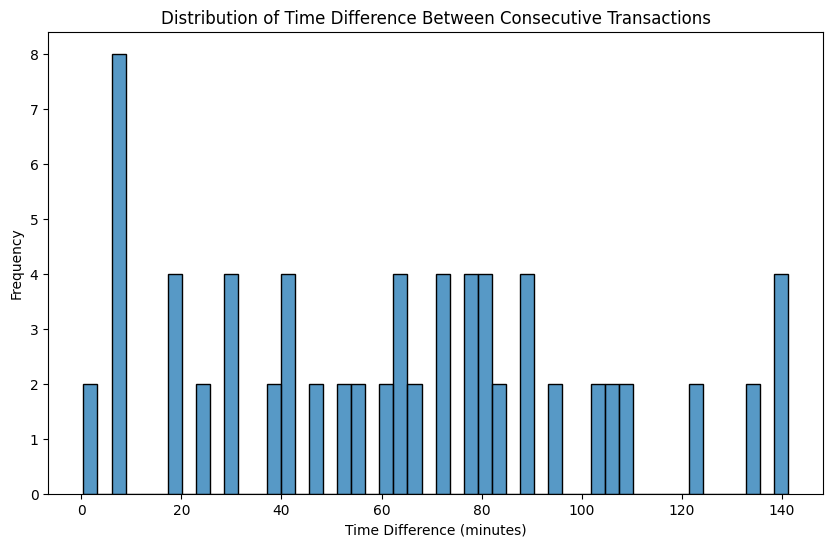

In [219]:
plt.figure(figsize=(10, 6))
sns.histplot(potential_anomalous_transactions['TimeDiff_minutes'].dropna(), bins=50)
plt.title('Distribution of Time Difference Between Consecutive Transactions')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.show()

In [220]:
display(potential_anomalous_transactions[potential_anomalous_transactions['TimeDiff_minutes'] < 10])

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDiff_minutes
1167,TX001168,AC00010,838.57,2023-06-26 16:08:25,Debit,Phoenix,D000430,115.30.82.168,M040,ATM,41,Doctor,273,1,14576.47,2024-11-04 08:11:25,8.416667
95,TX000096,AC00010,508.68,2023-06-26 16:16:50,Credit,Mesa,D000622,193.108.17.115,M048,Branch,51,Engineer,127,1,7708.41,2024-11-04 08:09:32,8.416667
1919,TX001920,AC00030,76.89,2023-05-10 17:49:57,Debit,Chicago,D000671,199.103.32.145,M011,ATM,55,Doctor,132,1,7374.26,2024-11-04 08:10:31,6.566667
2497,TX002498,AC00030,348.17,2023-05-10 17:56:31,Debit,El Paso,D000269,82.51.236.134,M072,ATM,21,Student,181,1,1887.84,2024-11-04 08:11:06,6.566667
141,TX000142,AC00114,1049.92,2023-10-23 16:50:33,Debit,Detroit,D000522,121.67.144.20,M052,ATM,80,Retired,21,1,2037.85,2024-11-04 08:10:34,7.516667
496,TX000497,AC00114,286.50,2023-10-23 16:58:04,Credit,Boston,D000602,16.128.130.153,M097,Branch,30,Engineer,60,1,8517.95,2024-11-04 08:09:17,7.516667
1054,TX001055,AC00151,382.07,2023-06-05 17:48:07,Credit,Omaha,D000318,21.97.154.92,M091,Branch,62,Doctor,147,1,10156.09,2024-11-04 08:08:17,0.433333
1746,TX001747,AC00151,305.18,2023-06-05 17:48:33,Debit,Chicago,D000699,93.146.251.20,M065,Online,58,Retired,216,1,4474.20,2024-11-04 08:08:22,0.433333
1943,TX001944,AC00213,117.25,2023-04-03 16:35:30,Credit,Atlanta,D000280,98.39.212.221,M091,Online,31,Doctor,73,1,13694.68,2024-11-04 08:08:29,6.283333
1294,TX001295,AC00213,91.38,2023-04-03 16:41:47,Debit,Jacksonville,D000609,163.129.70.210,M013,ATM,65,Retired,179,1,2402.58,2024-11-04 08:06:39,6.283333


We need to flag this transactions for further review or verification as these are happeining in quick succession from different IP Addresss.

In [221]:
len(potential_anomalous_transactions[potential_anomalous_transactions['TimeDiff_minutes'] < 10])

10

In [222]:
# Sort the DataFrame by AccountID and TransactionDate
df_sorted = df.sort_values(by=['AccountID', 'TransactionDate']).copy() # Add .copy() to avoid SettingWithCopyWarning

# Calculate the time difference between consecutive transactions for each account
# Use .diff() to get the difference from the previous transaction
df_sorted['TimeDiff_from_Previous_Transaction_minutes'] = df_sorted.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds() / 60

# The first transaction for each account will have a NaN in 'TimeDiff_from_Previous_Transaction_minutes'
# Fill these with 0
df_sorted['TimeDiff_from_Previous_Transaction_minutes'].fillna(0, inplace=True)

# Merge this back to the original DataFrame
df = df.merge(df_sorted[['TransactionID', 'TimeDiff_from_Previous_Transaction_minutes']], on='TransactionID', how='left')

display(df[['TransactionID', 'AccountID', 'TransactionDate', 'TimeDiff_from_Previous_Transaction_minutes']].head())

,TransactionID,AccountID,TransactionDate,TimeDiff_from_Previous_Transaction_minutes
0,TX000001,AC00128,2023-04-11 16:29:14,18616.950000
1,TX000002,AC00455,2023-06-27 16:44:19,11541.850000
2,TX000003,AC00019,2023-07-10 18:16:08,141221.966667
3,TX000004,AC00070,2023-05-05 16:32:11,14408.200000
4,TX000005,AC00411,2023-10-16 17:51:24,59107.800000


In [223]:
df_sorted_for_display = df.sort_values(by=['AccountID', 'TransactionDate'])
display(df_sorted_for_display[['TransactionID', 'AccountID', 'TransactionDate', 'TimeDiff_from_Previous_Transaction_minutes']])

,TransactionID,AccountID,TransactionDate,TimeDiff_from_Previous_Transaction_minutes
1312,TX001313,AC00001,2023-09-15 17:00:20,0.000000
2016,TX002017,AC00001,2023-11-14 16:56:34,86396.233333
2120,TX002121,AC00002,2023-01-10 16:00:32,0.000000
20,TX000021,AC00002,2023-02-28 16:36:58,70596.433333
1476,TX001477,AC00002,2023-05-05 16:35:44,95038.766667
...,...,...,...,...
1942,TX001943,AC00499,2023-11-27 16:14:25,17116.783333
2054,TX002055,AC00500,2023-01-30 16:37:53,0.000000
1715,TX001716,AC00500,2023-03-13 17:57:47,60559.900000
2374,TX002375,AC00500,2023-07-06 16:47:00,165529.216667


In [224]:
df.sort_values(by=['AccountID', 'TransactionDate'])

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDiff_from_Previous_Transaction_minutes
1312,TX001313,AC00001,47.79,2023-09-15 17:00:20,Debit,Denver,D000649,59.12.96.11,M034,Branch,25,Student,37,1,1649.92,2024-11-04 08:11:55,0.000000
2016,TX002017,AC00001,212.97,2023-11-14 16:56:34,Debit,Atlanta,D000492,45.241.13.208,M003,Online,59,Engineer,178,1,4180.40,2024-11-04 08:10:42,86396.233333
2120,TX002121,AC00002,476.99,2023-01-10 16:00:32,Debit,San Diego,D000594,113.137.153.101,M022,Online,23,Student,187,1,1154.48,2024-11-04 08:10:10,0.000000
20,TX000021,AC00002,59.32,2023-02-28 16:36:58,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,71,Retired,38,1,5750.89,2024-11-04 08:09:24,70596.433333
1476,TX001477,AC00002,12.62,2023-05-05 16:35:44,Debit,El Paso,D000475,93.160.83.196,M068,Branch,33,Doctor,61,1,6420.47,2024-11-04 08:09:03,95038.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,TX001943,AC00499,837.29,2023-11-27 16:14:25,Debit,Phoenix,D000189,217.233.219.196,M002,Branch,25,Student,216,1,6012.67,2024-11-04 08:07:12,17116.783333
2054,TX002055,AC00500,156.86,2023-01-30 16:37:53,Debit,Charlotte,D000168,11.167.243.171,M099,ATM,51,Doctor,102,1,14453.35,2024-11-04 08:10:27,0.000000
1715,TX001716,AC00500,225.93,2023-03-13 17:57:47,Credit,Omaha,D000142,147.114.91.132,M097,Branch,25,Student,199,1,1864.27,2024-11-04 08:08:39,60559.900000
2374,TX002375,AC00500,129.62,2023-07-06 16:47:00,Credit,San Jose,D000179,37.143.57.20,M070,ATM,23,Student,124,1,620.28,2024-11-04 08:06:51,165529.216667


# **Using Isolation Forest:**

## **Choosing the features:**

In [225]:
# Identify numerical features relevant for anomaly detection
numerical_features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance',"TimeDiff_from_Previous_Transaction_minutes"]

# Identify categorical features relevant for anomaly detection
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

print("\nSelected Numerical Features:", numerical_features)
print("Selected Categorical Features:", categorical_features)


Selected Numerical Features: ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TimeDiff_from_Previous_Transaction_minutes']
Selected Categorical Features: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']


## **Standardization of features:**

In [226]:
from sklearn.preprocessing import StandardScaler

# Create a new DataFrame with selected features
df_processed = df[numerical_features + categorical_features].copy()

# Apply one-hot encoding to categorical features
df_processed = pd.get_dummies(df_processed, columns=categorical_features, drop_first=True)

# Initialize StandardScaler and fit to numerical features
scaler = StandardScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

display(df_processed.head())

,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance,TimeDiff_from_Previous_Transaction_minutes,TransactionType_Debit,Location_Atlanta,Location_Austin,Location_Baltimore,Location_Boston,...,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-0.971275,-0.552443,-0.206794,-0.000537,-0.603003,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.269440,0.305314,-0.206794,2.216472,-0.698848,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.586882,-0.909842,-0.206794,-1.023534,1.057900,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.387456,-1.353017,-0.206794,0.885797,-0.660018,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,-0.973468,1.120184,-0.206794,0.593589,-0.054482,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True


## **Isolation Forest with contamination = "auto":**

In [227]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the preprocessed data
model.fit(df_processed)

# Predict anomaly scores
df['anomaly_score'] = model.decision_function(df_processed)

# Predict anomaly labels (-1 for anomalies, 1 for inliers)
df['anomaly_label'] = model.predict(df_processed)

# Display the original dataframe with the new anomaly columns
display(df[['TransactionID', 'anomaly_score', 'anomaly_label']].head())

,TransactionID,anomaly_score,anomaly_label
0,TX000001,0.155008,1
1,TX000002,0.142846,1
2,TX000003,0.136942,1
3,TX000004,0.144399,1
4,TX000005,0.123837,1


## **Analyzing the results:**

In [228]:
anomalies_df = df[df['anomaly_label'] == -1].copy()

anomalies_df_sorted = anomalies_df.sort_values(by='anomaly_score')

print("Anomalous transactions sorted by anomaly score (lowest scores first):")
display(anomalies_df_sorted.head())

print(f"\nTotal number of anomalies identified: {len(anomalies_df)}")

Anomalous transactions sorted by anomaly score (lowest scores first):


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDiff_from_Previous_Transaction_minutes,anomaly_score,anomaly_label



Total number of anomalies identified: 0


## **Further Investigate anomalies:**

Investigate the identified anomalies to determine if they are indeed fraudulent or unusual transactions.

Since no anomalies were detected in the previous step with `contamination='auto'`, I will re-run the Isolation Forest model with a fixed `contamination` value of 0.01 to force the model to identify 1% of the data as anomalies. Then I will filter the original dataframe to get the anomalous transactions, sort them by anomaly score, and display the head of the sorted anomalous transactions and the total number of anomalies.


In [229]:
from sklearn.ensemble import IsolationForest

# Instantiate the Isolation Forest model with a fixed contamination value
model = IsolationForest(contamination=0.01, random_state=42)

# Fit the model to the preprocessed data
model.fit(df_processed)

# Predict anomaly scores
df['anomaly_score'] = model.decision_function(df_processed)

# Predict anomaly labels (-1 for anomalies, 1 for inliers)
df['anomaly_label'] = model.predict(df_processed)

# Filter the original DataFrame to include only transactions labeled as anomalies
anomalies_df = df[df['anomaly_label'] == -1].copy()

# Sort the anomalous transactions by anomaly score in ascending order
anomalies_df_sorted = anomalies_df.sort_values(by='anomaly_score')

print("Anomalous transactions sorted by anomaly score:")
display(anomalies_df_sorted)

print(f"\nTotal number of anomalies identified: {len(anomalies_df)}")

Anomalous transactions sorted by anomaly score:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDiff_from_Previous_Transaction_minutes,anomaly_score,anomaly_label
508,TX000509,AC00353,127.00,2023-09-15 17:09:41,Credit,Nashville,D000024,154.138.163.229,M015,Branch,19,Student,68,5,431.16,2024-11-04 08:10:12,4279.250000,-0.032577,-1
2013,TX002014,AC00139,510.70,2023-06-07 16:35:27,Credit,Nashville,D000167,156.96.135.18,M040,Online,27,Student,294,1,5828.48,2024-11-04 08:07:57,28815.816667,-0.022879,-1
793,TX000794,AC00262,408.28,2023-03-15 16:33:09,Credit,Nashville,D000638,142.148.226.178,M028,Branch,21,Student,125,3,1222.77,2024-11-04 08:10:10,69026.150000,-0.022645,-1
1283,TX001284,AC00410,170.19,2023-07-07 17:40:58,Credit,Los Angeles,D000255,110.150.1.201,M077,Branch,27,Student,156,5,745.87,2024-11-04 08:12:16,174238.366667,-0.022248,-1
1703,TX001704,AC00205,1294.81,2023-12-11 16:53:08,Credit,Washington,D000489,76.0.164.168,M026,Branch,45,Engineer,279,1,9927.75,2024-11-04 08:11:44,339838.366667,-0.022176,-1
691,TX000692,AC00418,25.94,2023-10-16 18:53:31,Credit,San Jose,D000232,42.219.228.159,M003,Online,58,Retired,211,5,4815.11,2024-11-04 08:06:38,141.000000,-0.018111,-1
2380,TX002381,AC00098,1173.74,2023-09-25 16:44:52,Credit,Virginia Beach,D000639,193.190.29.63,M086,Online,61,Doctor,61,1,10456.24,2024-11-04 08:07:31,378762.166667,-0.014750,-1
665,TX000666,AC00393,152.18,2023-08-07 16:57:22,Credit,Los Angeles,D000637,40.244.94.218,M093,Online,39,Engineer,176,4,2459.84,2024-11-04 08:10:50,70585.350000,-0.014254,-1
486,TX000487,AC00148,1416.69,2023-01-16 17:00:11,Debit,Nashville,D000418,219.98.242.240,M015,ATM,46,Engineer,58,1,3740.73,2024-11-04 08:11:35,5703.083333,-0.012980,-1
1213,TX001214,AC00170,1192.20,2023-12-21 16:21:27,Credit,Jacksonville,D000174,40.10.25.102,M093,Branch,60,Retired,103,5,7816.41,2024-11-04 08:09:14,38841.000000,-0.009380,-1



Total number of anomalies identified: 26


In [230]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDiff_from_Previous_Transaction_minutes,anomaly_score,anomaly_label
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,18616.950000,0.071339,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,11541.850000,0.059177,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,141221.966667,0.053273,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,14408.200000,0.060730,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,59107.800000,0.040169,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29,23084.350000,0.027230,1
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42,17277.833333,0.056753,1
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39,44664.850000,0.044287,1
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22,0.000000,0.036792,1


This model gave us 26 transactions as potential anomalies for further review, as model forced top 1% by anomaly score as potential anomalies.

## **Combining model output with our previous potential anomalies data:**

In [231]:
# Filter potential_anomalous_transactions for TimeDiff_minutes < 10
short_interval_anomalies = potential_anomalous_transactions[potential_anomalous_transactions['TimeDiff_minutes'] < 10].copy()

# Add anomaly score and label from the main df
short_interval_anomalies = short_interval_anomalies.merge(df[['TransactionID', 'anomaly_score', 'anomaly_label']], on='TransactionID', how='left')

# Add a source column to identify where the anomaly came from
anomalies_df_sorted['Source'] = 'IsolationForest'
short_interval_anomalies['Source'] = 'ShortTimeDifference'

# Concatenate the two dataframes
combined_anomalies = pd.concat([anomalies_df_sorted, short_interval_anomalies], ignore_index=True)

# Fill NaN values in columns that are not present in both dataframes
combined_anomalies.fillna('N/A', inplace=True)

print("Combined potential anomalies:")
display(combined_anomalies)

Combined potential anomalies:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDiff_from_Previous_Transaction_minutes,anomaly_score,anomaly_label,Source,TimeDiff_minutes
0,TX000509,AC00353,127.00,2023-09-15 17:09:41,Credit,Nashville,D000024,154.138.163.229,M015,Branch,...,Student,68,5,431.16,2024-11-04 08:10:12,4279.25,-0.032577,-1,IsolationForest,N/A
1,TX002014,AC00139,510.70,2023-06-07 16:35:27,Credit,Nashville,D000167,156.96.135.18,M040,Online,...,Student,294,1,5828.48,2024-11-04 08:07:57,28815.816667,-0.022879,-1,IsolationForest,N/A
2,TX000794,AC00262,408.28,2023-03-15 16:33:09,Credit,Nashville,D000638,142.148.226.178,M028,Branch,...,Student,125,3,1222.77,2024-11-04 08:10:10,69026.15,-0.022645,-1,IsolationForest,N/A
3,TX001284,AC00410,170.19,2023-07-07 17:40:58,Credit,Los Angeles,D000255,110.150.1.201,M077,Branch,...,Student,156,5,745.87,2024-11-04 08:12:16,174238.366667,-0.022248,-1,IsolationForest,N/A
4,TX001704,AC00205,1294.81,2023-12-11 16:53:08,Credit,Washington,D000489,76.0.164.168,M026,Branch,...,Engineer,279,1,9927.75,2024-11-04 08:11:44,339838.366667,-0.022176,-1,IsolationForest,N/A
5,TX000692,AC00418,25.94,2023-10-16 18:53:31,Credit,San Jose,D000232,42.219.228.159,M003,Online,...,Retired,211,5,4815.11,2024-11-04 08:06:38,141.0,-0.018111,-1,IsolationForest,N/A
6,TX002381,AC00098,1173.74,2023-09-25 16:44:52,Credit,Virginia Beach,D000639,193.190.29.63,M086,Online,...,Doctor,61,1,10456.24,2024-11-04 08:07:31,378762.166667,-0.014750,-1,IsolationForest,N/A
7,TX000666,AC00393,152.18,2023-08-07 16:57:22,Credit,Los Angeles,D000637,40.244.94.218,M093,Online,...,Engineer,176,4,2459.84,2024-11-04 08:10:50,70585.35,-0.014254,-1,IsolationForest,N/A
8,TX000487,AC00148,1416.69,2023-01-16 17:00:11,Debit,Nashville,D000418,219.98.242.240,M015,ATM,...,Engineer,58,1,3740.73,2024-11-04 08:11:35,5703.083333,-0.012980,-1,IsolationForest,N/A
9,TX001214,AC00170,1192.20,2023-12-21 16:21:27,Credit,Jacksonville,D000174,40.10.25.102,M093,Branch,...,Retired,103,5,7816.41,2024-11-04 08:09:14,38841.0,-0.009380,-1,IsolationForest,N/A


In [232]:
duplicates = combined_anomalies[combined_anomalies.duplicated(subset=['TransactionID'], keep=False)]

if not duplicates.empty:
    print("Duplicate transactions found in the combined anomalies:")
    display(duplicates.sort_values(by='TransactionID'))
else:
    print("No duplicate transactions found in the combined anomalies.")

No duplicate transactions found in the combined anomalies.


In [233]:
combined_anomalies.to_csv('/content/drive/MyDrive/Detecting Anomalies in Transaction/flagged_transaction.csv')